## **CNN with MNIST Data**

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

In [2]:
from tensorflow.keras.datasets.mnist import load_data    # To load the MNIST digit dataset

(X_train, y_train) , (X_test, y_test) = load_data()      # Loading data

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [4]:
# Checking the shape of one image
X_train[5].shape

(28, 28)

In [5]:
X_train[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
X_train[5].shape

(28, 28)

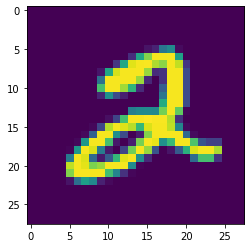

In [7]:
plt.imshow(X_train[5]) # imageımın 2 oldugunu değerlendiriyorum
# plt.matshow(X_train[5])

In [9]:
y_train[5] # kontrolunu yapıyorum evet 2 

2

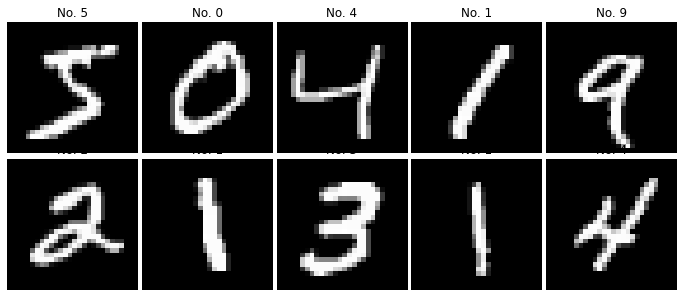

In [10]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()
# train setimdeki imajlar bunlar

## Data Preprocessing

In [11]:
X_train[5].min()

0

In [12]:
X_train[5].max()

255

In [ ]:
# 0 dan 255e oldukça fark var ve bunu scale etmem gerekiyor

In [14]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
# scale işlemini manuel yaptım yani normalize ettim

In [15]:
X_train[5].min()

0.0

In [16]:
X_train[5].max()

0.003921569

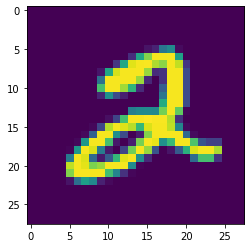

In [17]:
plt.imshow(X_train[5])

In [19]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1)  # 60bin sayıyı 28*28 olack şekilde siyah beyaz ayarladım
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [20]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [31]:
y_train 

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# classification yapmam için bunları kategorical yapmam gerekiyor

In [29]:
from tensorflow.keras.utils import to_categorical # y_traini categorik hale getirdim

In [30]:
Y_train = to_categorical(y_train, 10) # 10 sınıfa dönüştür
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [35]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))
                # 32 filtre koy   ( modelin class sayısına baglıdır)  
                   # filtre boyutu 3*3 
                       # sisteme gelecek veriler 28*28 ve siyah beyaz olsun  


model.add(MaxPool2D(pool_size=(2, 2))) #pikseller çok fazla ise artırılabilir ama 2*2 default tercih sebebi

model.add(Flatten()) # flatten matrisleri vektöre dönüştürür

model.add(Dense(128, activation='relu')) # 128 nöron , nöral network

model.add(Dense(10, activation='softmax')) # 10 clasımız var dolayısıyla softmax tercih edilir

model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

**A sample example showing the conversion of 3D data to 2D**
![3Dto2D](https://dphi-courses.s3.ap-south-1.amazonaws.com/Deep+Learning+Bootcamp/3D+to++2D.png)

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [38]:
from tensorflow.keras.callbacks import EarlyStopping # modelim overfite gitmesin

In [39]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [41]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])


Epoch 1/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2970 - accuracy: 0.9112 - val_loss: 0.2663 - val_accuracy: 0.9230
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2586 - accuracy: 0.9235 - val_loss: 0.2342 - val_accuracy: 0.9317
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2275 - accuracy: 0.9317 - val_loss: 0.2015 - val_accuracy: 0.9391
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2005 - accuracy: 0.9404 - val_loss: 0.1808 - val_accuracy: 0.9449
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1806 - accuracy: 0.9460 - val_loss: 0.1722 - val_accuracy: 0.9480
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1652 - accuracy: 0.9508 - val_loss: 0.1543 - val_accuracy: 0.9534
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1516 - accuracy: 0.9543 - val_loss: 0.1400 -

In [42]:
model.metrics_names

['loss', 'accuracy']

In [43]:
model.history.history

{'accuracy': [0.9111833572387695,
  0.9234833121299744,
  0.9316999912261963,
  0.9404000043869019,
  0.9460333585739136,
  0.9508166909217834,
  0.9543333053588867,
  0.9575833082199097,
  0.960266649723053,
  0.9624666571617126],
 'loss': [0.297014057636261,
  0.2585813105106354,
  0.22747108340263367,
  0.2004752904176712,
  0.18057626485824585,
  0.16519300639629364,
  0.15163609385490417,
  0.14021067321300507,
  0.1307951956987381,
  0.12323630601167679],
 'val_accuracy': [0.9229999780654907,
  0.9316999912261963,
  0.9391000270843506,
  0.9448999762535095,
  0.9480000138282776,
  0.9534000158309937,
  0.9585000276565552,
  0.9584000110626221,
  0.9595000147819519,
  0.9628000259399414],
 'val_loss': [0.26627302169799805,
  0.2341826856136322,
  0.20147310197353363,
  0.18076956272125244,
  0.17222991585731506,
  0.15429507195949554,
  0.14002223312854767,
  0.13520829379558563,
  0.12996822595596313,
  0.11990179121494293]}

In [44]:
summary = pd.DataFrame(model.history.history)
summary.head() # overfit var mı onu karşılaştırmak için df yaptım

,loss,accuracy,val_loss,val_accuracy
0,0.297014,0.911183,0.266273,0.9230
1,0.258581,0.923483,0.234183,0.9317
2,0.227471,0.931700,0.201473,0.9391
3,0.200475,0.940400,0.180770,0.9449
4,0.180576,0.946033,0.172230,0.9480


Text(0.5, 0, 'Epoch')

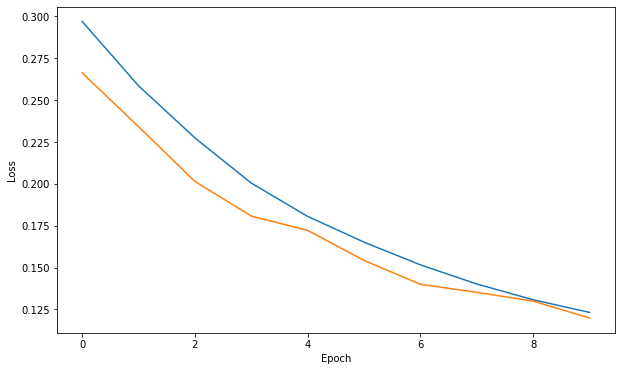

In [45]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")

Text(0.5, 0, 'Epoch')

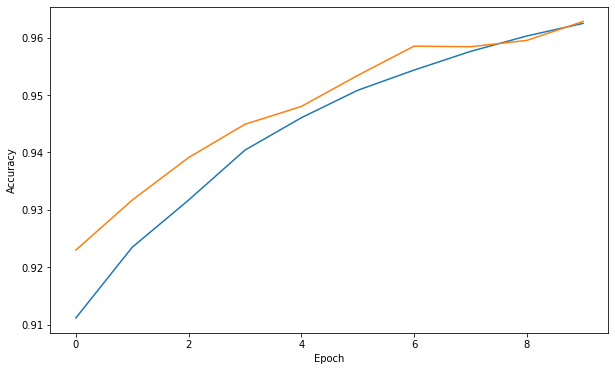

In [46]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")

In [48]:
print(model.evaluate(X_test,Y_test,verbose=1)) # 1. loss 2. accuracy değerini verir

313/313 [==============================] - 2s 6ms/step - loss: 0.1199 - accuracy: 0.9628
[0.11990179121494293, 0.9628000259399414]


In [49]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
preds = model.predict(X_test) # olasıkları bulduk


In [53]:
predictions= np.argmax(preds, axis=1) # en büyük değerin indexine bktım

In [54]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [56]:
print(classification_report(y_test, predictions))
# classlarımın tahmin değerleri yüksek

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.96      0.96      1032
           3       0.95      0.97      0.96      1010
           4       0.98      0.95      0.96       982
           5       0.95      0.97      0.96       892
           6       0.98      0.96      0.97       958
           7       0.96      0.96      0.96      1028
           8       0.97      0.94      0.95       974
           9       0.94      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [57]:
print(confusion_matrix(y_test, predictions))

[[ 968    0    1    3    0    3    2    1    2    0]
 [   0 1123    3    1    0    1    3    0    4    0]
 [  10    1  990    6    3    2    3    9    8    0]
 [   0    0    8  978    1    7    0    8    3    5]
 [   1    1    8    0  928    2    3    3    2   34]
 [   4    1    0   12    0  861    4    1    5    4]
 [   9    4    6    2    2   10  920    1    4    0]
 [   1    9   13    3    0    1    0  983    2   16]
 [   5    2    4   14    6   10    6    7  915    5]
 [   6    6    1   11    8    6    1    7    1  962]]


In [58]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11990179121494293
Test accuracy: 0.9628000259399414


In [65]:
my_number = X_test[5] # bir değer alıp bakalım xtestin 0. indexi

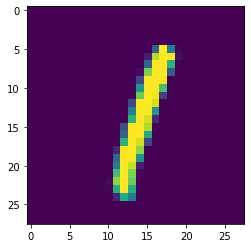

In [66]:
plt.imshow(my_number.reshape(28,28)) # 

In [70]:
model.predict(my_number.reshape(1,28,28,1)) #üstteki 7 yi tahmin ettirelim , kerasın algılayacagı sekilde ve siyah beyaz olacak şekilde
# my_numberin hangi classa denk geldiginin ihtimal değerlerini verdi bu bize bi şey ifade etmiyor

array([[2.5130228e-07, 9.9438357e-01, 1.5329642e-04, 2.2620638e-04,
        2.5500826e-06, 1.7479438e-06, 3.0571107e-07, 5.1523112e-03,
        7.3718642e-05, 5.9999597e-06]], dtype=float32)

In [71]:
# SHAPE --> (num_images,width,height,color_channels)
# numpydaki yerini göstermek icin argmax ile gösterdik ve  1 döndürdü yani modelimiz doğru tahmin etti 
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1)

array([1])

In [72]:
model.save("cnn-1.h5")